# Calour microbiome databases interface tutorial

## Setup

In [1]:
import calour as ca

/Users/amnon/miniconda3/envs/calour/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ca.set_log_level(11)

In [3]:
%matplotlib notebook

## Load the data
We will use the Chronic faitigue syndrome data from:

Giloteaux, L., Goodrich, J.K., Walters, W.A., Levine, S.M., Ley, R.E. and Hanson, M.R., 2016.

Reduced diversity and altered composition of the gut microbiome in individuals with myalgic encephalomyelitis/chronic fatigue syndrome.

Microbiome, 4(1), p.30.

In [4]:
cfs=ca.read_amplicon('data/chronic-fatigue-syndrome.biom',
                     'data/chronic-fatigue-syndrome.sample.txt',
                     normalize=10000,min_reads=1000)

2018-03-04 12:33:59 INFO loaded 87 samples, 2129 features
2018-03-04 12:33:59 WARNING These have metadata but do not have data - dropped: {'ERR1331814'}
2018-03-04 12:33:59 INFO After filtering, 87 remaining


## preprocess
remove non-interesting bacteria, cluster bacteria and sort samples by disease status

In [5]:
cfs=cfs.filter_abundance(10)

2018-03-04 12:34:01 INFO After filtering, 1100 remaining


In [6]:
cfs=cfs.cluster_features()

2018-03-04 12:34:01 INFO After filtering, 1100 remaining


In [7]:
cfs=cfs.sort_samples('Subject')

## Viewing database annotations
in the interactive heatmap, when clicking on a bacteria, we get a list of all database results about the selected bacteria.

We can choose which databases to use by the `databases=['dbbact',...]` parameter. The possible databases depend on which database modules were installed.

Currently, supported microbiome database interfaces include:

* dbBact - a community database for manual annotations about bacteria (interface installation instruction at [dbbact-calour](https://github.com/amnona/dbbact-calour)).

* SpongeEMP - an automatic database for sea sponge samples (interface installation instruction at [spongeworld-calour](https://github.com/amnona/spongeworld-calour)).

* phenoDB - phenotypic information about selected bacteria (interface installation instruction at [pheno-calour](https://github.com/amnona/pheno-calour)).

By default, calour uses the dbBact database for microbiome data

<IPython.core.display.Javascript object>


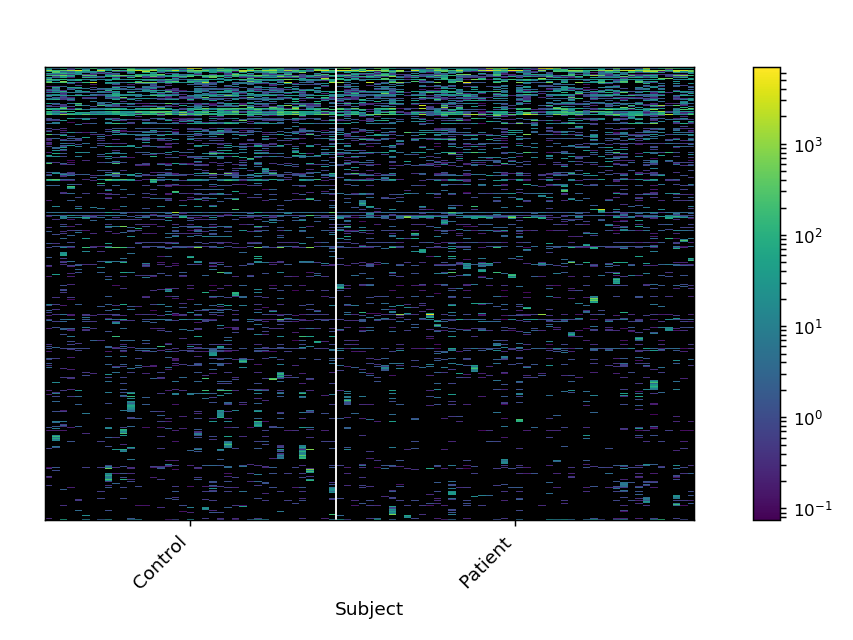

In [8]:
cfs.plot(sample_field='Subject',gui='jupyter')

## dbBact enrichment of selected bacteria
By selecting a set of bacteria (using the shift+click or ctrl+click) and choosing the "Enrichment" button, we can get a list of terms that are significantly enriched in the selected bacteria compared to the rest of the bacteria in the plot

## Adding dbBact annotations
(Only possible using the `gui='qt5'` GUI)

To add a new annotation to the selected set of bacteria, choose the "Annotate" button.

Detailed instructions are available at the dbBact.org website.

## Differential abundance
To find the bacteria significantly different between samples with 'Control' (healthy) and 'Patient' (sick) in the 'Subject' field.

In [9]:
dd=cfs.diff_abundance(field='Subject',val1='Control',val2='Patient', random_seed=2018)

2018-03-04 12:34:14 INFO 87 samples with both values
2018-03-04 12:34:14 INFO After filtering, 1100 remaining
2018-03-04 12:34:14 INFO 39 samples with value 1 (['Control'])
2018-03-04 12:34:15 INFO method meandiff. number of higher in ['Control'] : 38. number of higher in ['Patient'] : 16. total 54


### Plot the significant bacteria
When clicking on a bacteria, we'll get both dbBact, SpongeEMP, and phenoDB information

<IPython.core.display.Javascript object>


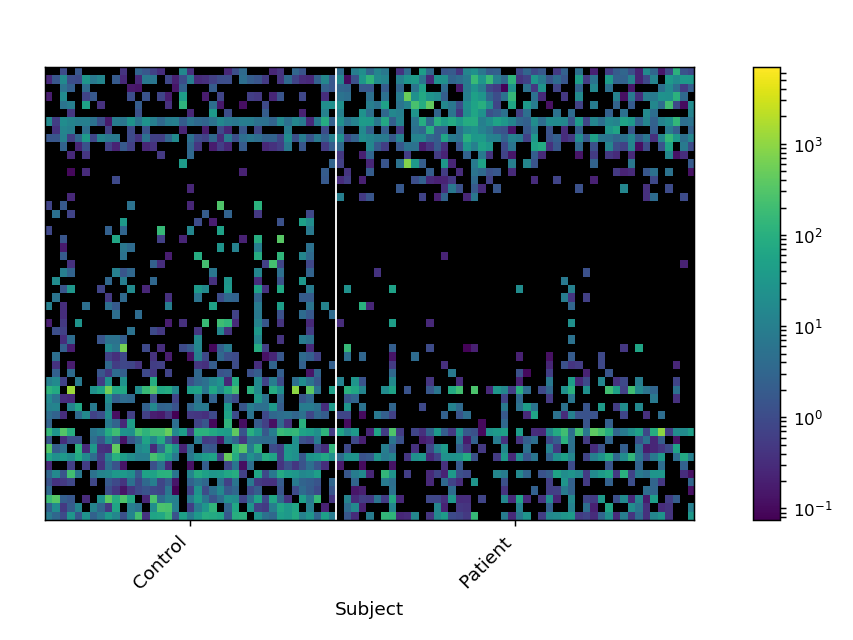

In [10]:
dd.plot(sample_field='Subject', gui='jupyter', databases=['dbbact','sponge'])

## dbBact term enrichment (`diff_abundance_enrichment`)
We can ask what is special in the bacteria significanly higher in the Control vs. the Patient group and vice versa.

* Note since we need to get the per-feature annotations from dbBact, we need a live internet connection to run this command.

### Default parameters

2018-03-04 12:34:24 INFO Getting dbBact annotations for 54 sequences, please wait...
2018-03-04 12:34:28 INFO Got 1984 annotations
2018-03-04 12:34:28 INFO Added annotation data to experiment. Total 622 annotations, 54 terms
2018-03-04 12:34:28 INFO removed 153 terms


<IPython.core.display.Javascript object>


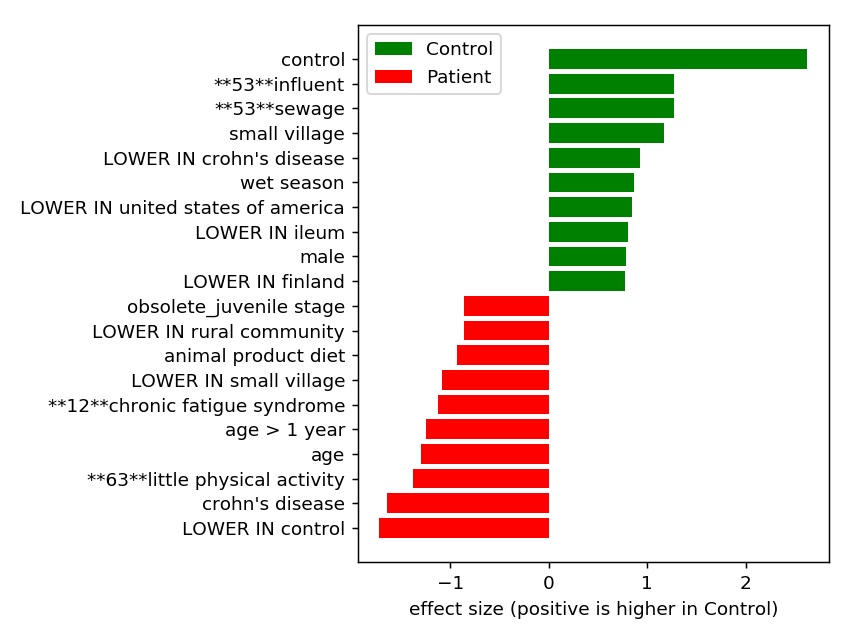

In [11]:
ax, enriched=dd.plot_diff_abundance_enrichment()

The enriched terms are in a calour experiment class (terms are features, bacteria are samples), so we can see the
list of enriched terms with the p-value (pval) and effect size (odif)

In [12]:
enriched.feature_metadata

,odif,pvals,term
-control,-1.720395,0.000999,-control
crohn's disease,-1.640351,0.000999,crohn's disease
**63**little physical activity,-1.375000,0.000999,**63**little physical activity
age,-1.301136,0.024975,age
age > 1 year,-1.250000,0.001998,age > 1 year
**12**chronic fatigue syndrome,-1.125000,0.000999,**12**chronic fatigue syndrome
-small village,-1.085526,0.000999,-small village
animal product diet,-0.934211,0.002997,animal product diet
-rural community,-0.858553,0.000999,-rural community
obsolete_juvenile stage,-0.856908,0.000999,obsolete_juvenile stage


We can plot the enriched terms heatmap to see the term scores for each bacteria.

Note now rows are the bacteria and columns are the terms

<IPython.core.display.Javascript object>


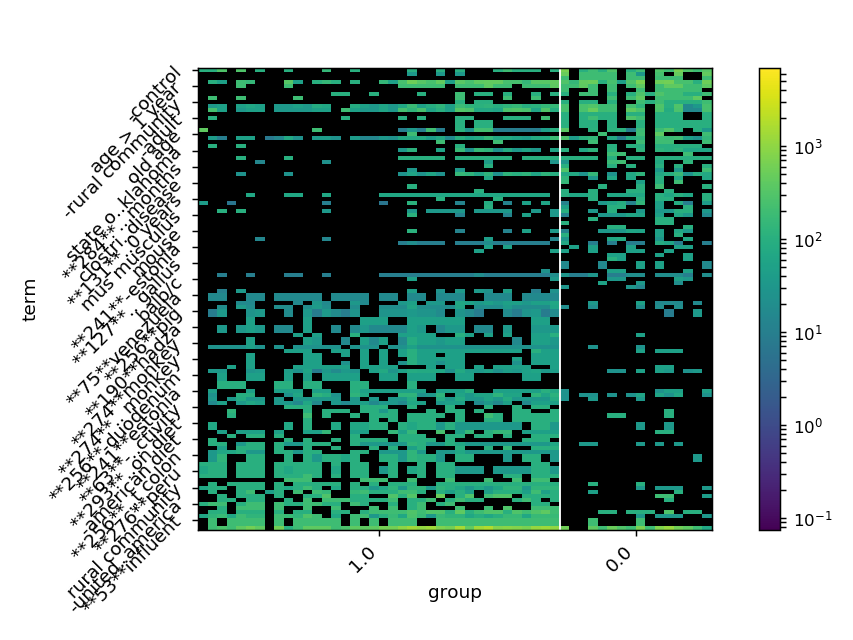

In [13]:
enriched.plot(gui='jupyter', databases=[], feature_field='term',sample_field='group')

### getting enriched annotations instead of terms
Each annotation is coming from a single experiment (as opposed to terms that can come from annotations in multiple experiment)

2018-03-04 12:34:38 INFO removed 0 terms


<IPython.core.display.Javascript object>


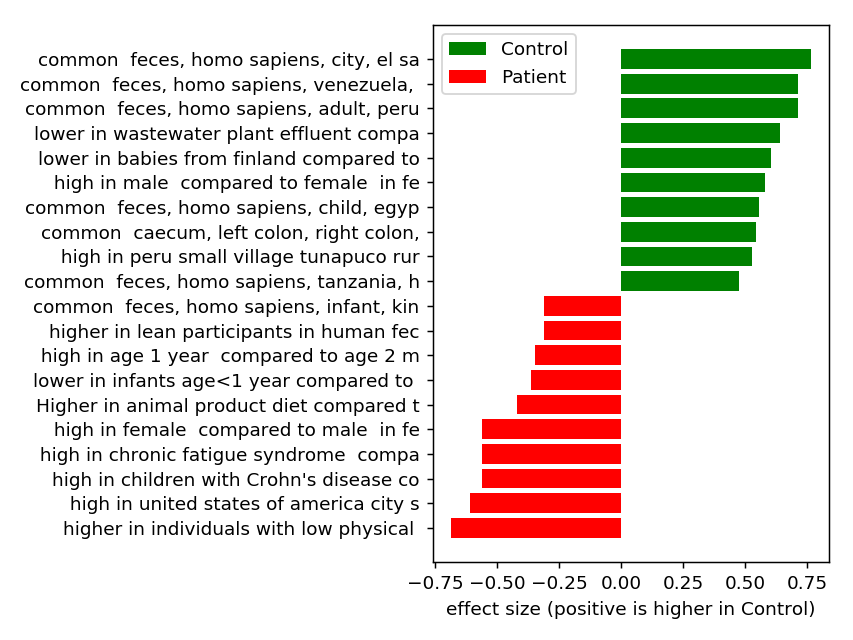

In [14]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='annotation')

In [ ]:
enriched.feature_metadata

### Getting both enriched terms and annotations

2018-03-04 12:34:40 INFO removed 153 terms


<IPython.core.display.Javascript object>


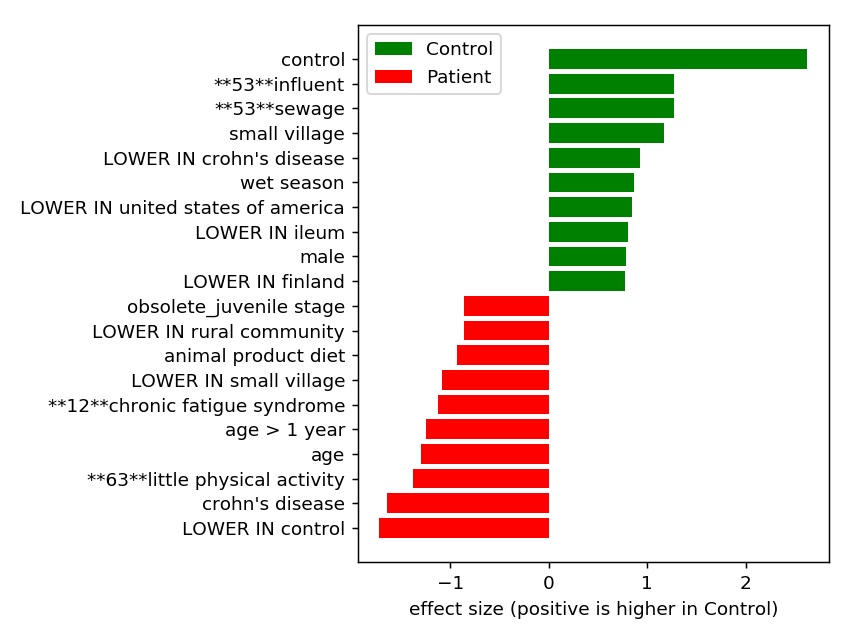

In [15]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined')

In [ ]:
enriched.feature_metadata

### Ignoring selected experiments already in dbBact
If our experiment is already in dbBact, or if there are other experiments in dbBact we do not want to include in the enrichment analysis, we can specify them using the `ignore_exp=[expID,...]` parameter.

In our case, the cfs experiment is already added to dbBact, so let's ignore it's annotations when doing the analysis. By looking at [dbBact.org](dbBact.org) we know its experimentID is 12. Alternatively we can use `ignore_exp=True` to automatically detect the current experimentID if it exists in dbBact (using the data and mapping file md5 hash).

2018-03-04 12:34:41 INFO removed 150 terms


<IPython.core.display.Javascript object>


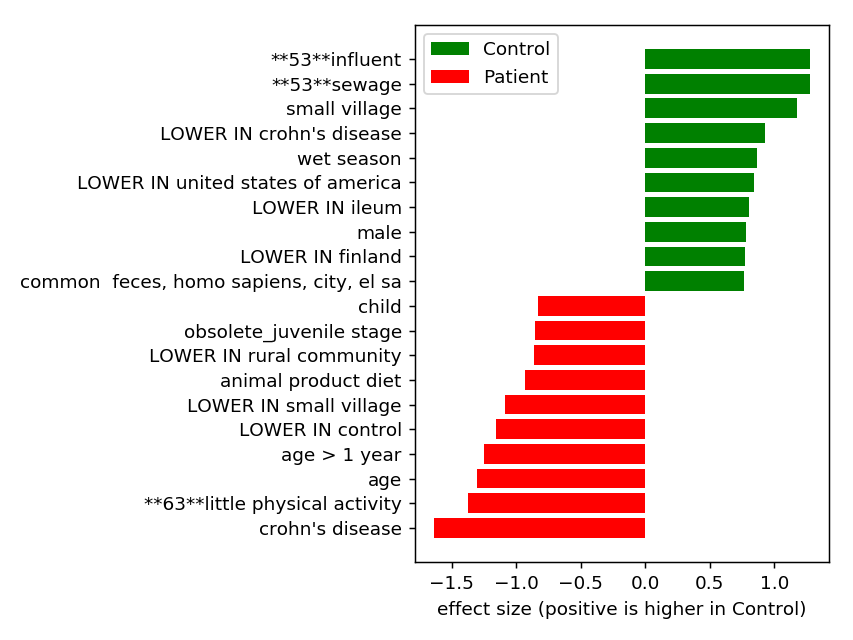

In [16]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined', ignore_exp=[12])

## Adding common dbBact terms to features (`add_terms_to_features`)
We can attach to each bacteria the most common dbBact term associated with it.

The terms are selected from all of the dbBact terms, or can be selected from a supplied list.

In [17]:
cfs=cfs.add_terms_to_features(dbname='dbbact',use_term_list=['feces','saliva','skin','mus musculus'])

2018-03-04 12:34:43 INFO Getting dbBact annotations for 1100 sequences, please wait...
2018-03-04 12:34:53 INFO Got 20652 annotations
2018-03-04 12:34:53 INFO Added annotation data to experiment. Total 1802 annotations, 1100 terms


In [18]:
tt=cfs.sort_by_metadata('common_term',axis='feature')

<IPython.core.display.Javascript object>


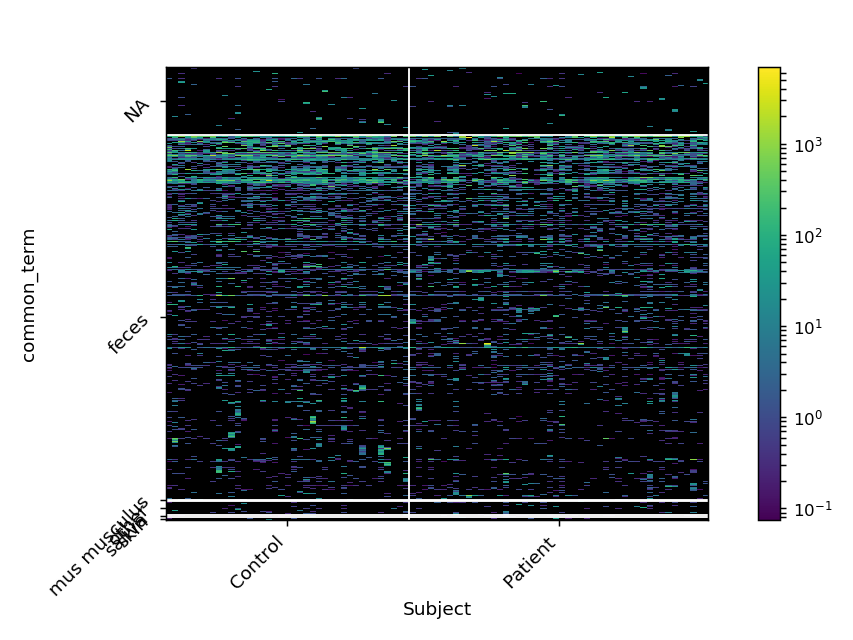

In [19]:
tt.plot(sample_field='Subject', feature_field='common_term', gui='jupyter')

## Get enriched terms using all bacteria

In [20]:
dbbact=ca.database._get_database_class('dbbact')

In [21]:
enriched=dbbact.sample_enrichment(cfs,'Subject','Control','Patient',
                                  term_type='combined',ignore_exp=[12])

2018-03-04 12:34:55 INFO 87 samples with both values
2018-03-04 12:34:55 INFO After filtering, 2261 remaining
2018-03-04 12:34:55 INFO 39 samples with value 1 (['Control'])
2018-03-04 12:34:57 INFO method meandiff. number of higher in ['Control'] : 395. number of higher in ['Patient'] : 55. total 450


In [22]:
enriched.feature_metadata

,0,num_features,_calour_diff_abundance_effect,_calour_diff_abundance_pval,_calour_diff_abundance_group
little physical activity,little physical activity,49,-50.232446,0.000999,Patient
crohn's disease,crohn's disease,95,-47.958031,0.000999,Patient
high in female compared to male in feces homo sapiens united states of america,high in female compared to male in feces ho...,183,-30.352793,0.000999,Patient
-physical activity,-physical activity,49,-25.116223,0.000999,Patient
higher in individuals with low physical activity ( high in little physical activity compared to physical activity in feces homo sapiens united states of america,higher in individuals with low physical activi...,49,-25.116223,0.000999,Patient
high in children with Crohn's disease compared to healthy adult controls ( high in crohn's disease child obsolete_juvenile stage compared to control adult in feces homo sapiens glasgow,high in children with Crohn's disease compared...,53,-22.048440,0.000999,Patient
enzyme supplement,enzyme supplement,20,-19.920170,0.001998,Patient
old age,old age,47,-14.775536,0.009990,Patient
-no enzyme supplement,-no enzyme supplement,20,-9.960085,0.001998,Patient
high in EPI dogs with enzyme supplement compared to no supplement ( high in enzyme supplement compared to no enzyme supplement in feces united states of america exocrine pancreatic insufficiency canis lupus familiaris dog,high in EPI dogs with enzyme supplement compar...,20,-9.960085,0.001998,Patient
